In [1]:
# Setup

from dolo import *
import dolark 
from dolark import HModel
from dolark.equilibrium import find_steady_state
from dolark.perturbation import perturb
from dolo import time_iteration, improved_time_iteration
from matplotlib import pyplot as plt
import numpy as np

In [2]:
#HModel reads the yaml file
aggmodel = HModel('Aiyagari.yaml')
aggmodel


In [3]:
aggmodel.features

{'ex-ante-identical': True,
 'conditional-processes': False,
 'iid-shocks': False}

In [4]:
#first check whether the one-agent sub-part of the mode works
from dolo import time_iteration
i_opts = {"N":2}
model = aggmodel.model
mc = model.exogenous.discretize(to='mc',options=[{},i_opts])
sol0 = time_iteration(model, details=True, dprocess=mc)

    calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.


------------------------------------------------
| N   |  Error     | Gain     | Time     | nit |
------------------------------------------------


    Did not converge


|   1 |  9.287e+01 |      nan |    1.321 |  10 |
|   2 |  3.087e+01 |    0.332 |    0.020 |   4 |
|   3 |  1.536e+01 |    0.498 |    0.020 |   4 |
|   4 |  9.155e+00 |    0.596 |    0.015 |   3 |
|   5 |  6.050e+00 |    0.661 |    0.016 |   3 |
|   6 |  4.273e+00 |    0.706 |    0.024 |   5 |
|   7 |  3.161e+00 |    0.740 |    0.016 |   3 |
|   8 |  2.418e+00 |    0.765 |    0.017 |   3 |
|   9 |  1.896e+00 |    0.784 |    0.015 |   3 |
|  10 |  1.514e+00 |    0.799 |    0.015 |   3 |
|  11 |  1.227e+00 |    0.810 |    0.011 |   2 |
|  12 |  1.004e+00 |    0.818 |    0.011 |   2 |
|  13 |  8.270e-01 |    0.824 |    0.010 |   2 |
|  14 |  6.845e-01 |    0.828 |    0.011 |   2 |
|  15 |  5.671e-01 |    0.828 |    0.011 |   2 |
|  16 |  4.696e-01 |    0.828 |    0.012 |   2 |
|  17 |  3.874e-01 |    0.825 |    0.011 |   2 |
|  18 |  3.156e-01 |    0.815 |    0.011 |   2 |
|  19 |  2.519e-01 |    0.798 |    0.011 |   2 |
|  20 |  1.960e-01 |    0.778 |    0.012 |   2 |
|  21 |  1.480e-01 |

In [5]:
eq = find_steady_state(aggmodel)
eq

Computing Initial Initial Rule... done
Computing Steady State...done


In [6]:
help(find_steady_state)

Help on function find_steady_state in module dolark.equilibrium:

find_steady_state(hmodel, dr0=None, verbose=True, distribs=None)



In [7]:
help(HModel)

Help on class HModel in module dolark.model:

class HModel(builtins.object)
 |  HModel(fname, i_options={}, dptype=None, debug=False)
 |  
 |  Methods defined here:
 |  
 |  A(self, grids, m0: 'n_e', μ0: 'n_m.N', xx0: 'n_m.N.n_x', y0: 'n_y', p: 'n_p')
 |  
 |  __get_calibration__(self)
 |  
 |  __init__(self, fname, i_options={}, dptype=None, debug=False)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __set_changed__(self)
 |  
 |  check(self)
 |  
 |  get_starting_rule(self, method='improved_time_iteration', **kwargs)
 |  
 |  set_calibration(self, *pargs, **kwargs)
 |  
 |  τ(self, m, p)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  E
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  agent
 |  
 |  calibration
 |  
 |  distribution
 |  
 |  exogenous
 |  
 |  featu

In [8]:
help(eq)

Help on Equilibrium in module dolark.equilibrium object:

class Equilibrium(builtins.object)
 |  Equilibrium(aggmodel, m, μ, dr, y)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, aggmodel, m, μ, dr, y)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  as_df(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [9]:
eq.dr

In [10]:
eq.y  # y is the aggregate endogenous variable

array([6.33612038])

In [11]:
eq.m # aggregate exogenous

array([0.])

In [12]:
eq.aggmodel

In [13]:
print(eq.μ[0,:].sum())
print(eq.μ[1,:].sum())
print(eq.μ[2,:].sum())

0.24999999999999994
0.5000000000000004
0.24999999999999936


In [14]:
eq.μ.shape[0]

3

Text(0.5, 1.0, 'Wealth Distribution by Income')

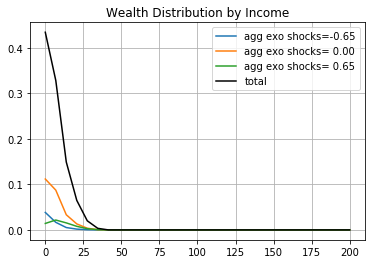

In [15]:
for i in range(eq.μ.shape[0]):
    s = eq.dr.endo_grid.nodes() # grid for states (temporary)
    plt.plot(s, eq.μ[i,:]*(eq.μ[i,:].sum()), label=f"agg exo shocks={eq.dr.exo_grid.node(i)[2]: .2f}")
plt.plot(s, eq.μ.sum(axis=0), label='total', color='black')
plt.grid()
plt.legend(loc='upper right')
plt.title("Wealth Distribution by Income")

In [16]:
eq.dr.exo_grid.nodes()

array([[ 0.03044232,  1.2440459 , -0.64888568],
       [ 0.03044232,  1.2440459 ,  0.        ],
       [ 0.03044232,  1.2440459 ,  0.64888568]])

In [29]:
import altair as alt
import pandas as pd
single = alt.selection_single(on='mouseover', nearest=True)
df = eq.as_df()
ch = alt.Chart(df)
spec = ch.properties(title='Distribution', height=100).mark_line().encode(
    x = 'a',
    y = 'μ',
    color = alt.condition(single, 'i_m:N', alt.value('lightgray'))
).add_selection(
        single
) + ch.mark_line(color='black').encode(
    x = 'a',
    y = 'sum(μ)'
) & ch.properties(title='Decision Rule', height=100).mark_line().encode(
    x = 'a',
    y = 'i',
    color = alt.condition(single, 'i_m:N', alt.value('lightgray'))
).add_selection(
        single
)

In [24]:
eq.as_df()

,i_m,r,w,e,a,μ,i
0,0.0,0.030442,1.244046,-0.648886,-1.000000e-10,1.537294e-01,-1.000000e-10
1,0.0,0.030442,1.244046,-0.648886,6.896552e+00,6.660702e-02,6.418651e+00
2,0.0,0.030442,1.244046,-0.648886,1.379310e+01,2.084279e-02,1.305163e+01
3,0.0,0.030442,1.244046,-0.648886,2.068966e+01,6.928995e-03,1.978489e+01
4,0.0,0.030442,1.244046,-0.648886,2.758621e+01,1.666539e-03,2.655182e+01
5,0.0,0.030442,1.244046,-0.648886,3.448276e+01,2.228881e-04,3.333614e+01
6,0.0,0.030442,1.244046,-0.648886,4.137931e+01,2.319558e-06,4.013077e+01
7,0.0,0.030442,1.244046,-0.648886,4.827586e+01,-1.710984e-16,4.693204e+01
8,0.0,0.030442,1.244046,-0.648886,5.517241e+01,-1.555126e-16,5.373786e+01
9,0.0,0.030442,1.244046,-0.648886,6.206897e+01,-1.429016e-16,6.054693e+01


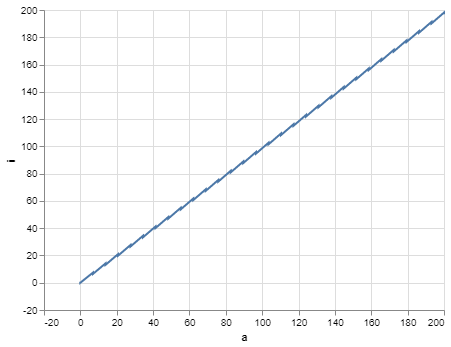

In [19]:
import altair as alt
import pandas as pd
single = alt.selection_single(on='mouseover', nearest=True)
df = eq.as_df()
alt.Chart(df).mark_line().encode(
    x = 'a',
    y = 'i',
)

In [42]:
import math

In [43]:
# calcualte consumption
a = df['a']
r = df['r']
w = df['w']
e = df['e']
i = df['i']
c = (1+r)*a + w*math.exp(e) - i

TypeError: cannot convert the series to <class 'float'>